In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 3s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

2021-12-06 08:30:56.654296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 08:30:56.657426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-12-06 08:30:56.657498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2021-12-06 08:30:56.657609: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [5]:
model = keras.Sequential()
model.add(keras.layers.Input(x_train.shape[-1]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 2s 761us/step - loss: 0.2776 - accuracy: 0.9217


In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 606us/step - loss: 0.1586 - accuracy: 0.9525


[0.15856719017028809, 0.9524999856948853]

In [8]:
y_pred = model.predict(x_test)

In [9]:
y_pred[:2]

array([[1.2257155e-05, 5.0062098e-08, 2.7678156e-04, 5.5814505e-04,
        1.7029339e-07, 1.0510900e-05, 1.0923140e-08, 9.9898559e-01,
        7.5604930e-06, 1.4874467e-04],
       [2.0690875e-05, 2.4619800e-04, 9.9409842e-01, 2.3976183e-03,
        1.0954233e-10, 1.9889090e-03, 1.3411212e-04, 2.6469396e-10,
        1.1139235e-03, 3.0953724e-09]], dtype=float32)

In [10]:
y_pred_cat = y_pred.argmax(axis=-1)
y_pred_cat

array([7, 2, 1, ..., 4, 5, 6])

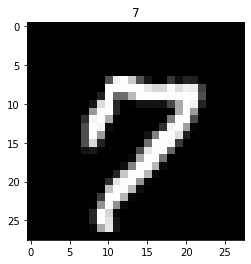

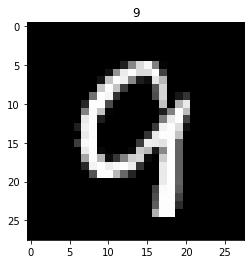

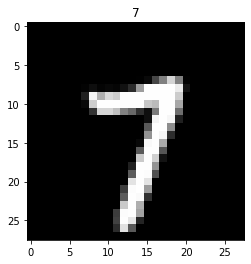

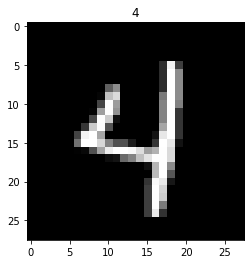

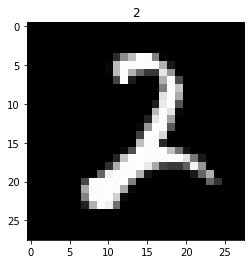

In [11]:
for i in np.random.choice(len(x_test), 5, replace=False):
    x_img = x_test[i].reshape(28, 28)
    plt.imshow(x_img, cmap="gray")
    plt.title(y_pred_cat[i])
    plt.show()

## Softmax
$$
\begin{align}
\text{softmax}(x) = \frac{\exp(x_d)}{\sum_{d=1}^D\exp(x_d)}
\end{align}
$$


In [12]:
x = tf.random.normal((5, 3))
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.3657276 , -0.26067016, -0.8220584 ],
       [ 1.5040728 ,  1.5938897 , -1.7089051 ],
       [-0.8767525 , -0.8186271 , -0.87648386],
       [ 0.45890093,  0.45283702, -0.5018823 ],
       [-1.3269031 ,  0.27471396,  0.16554618]], dtype=float32)>

In [13]:
tf.keras.layers.Softmax()(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.3643812 , 0.4047453 , 0.23087345],
       [0.4685573 , 0.5125895 , 0.01885316],
       [0.32678494, 0.34634233, 0.32687274],
       [0.42077845, 0.41823462, 0.16098693],
       [0.09607048, 0.4766103 , 0.42731926]], dtype=float32)>

In [14]:
tf.keras.layers.Softmax()(x).numpy().sum(axis=-1)

array([1., 1., 1., 1., 1.], dtype=float32)

In [15]:
def softmax(x):
    exp_x = tf.exp(x)
    exp_sum = tf.math.reduce_sum(exp_x, axis=-1, keepdims=True)
    return exp_x / exp_sum

In [16]:
softmax(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.3643812 , 0.4047453 , 0.23087347],
       [0.46855733, 0.5125895 , 0.01885316],
       [0.32678497, 0.34634233, 0.32687274],
       [0.42077845, 0.41823462, 0.16098695],
       [0.09607048, 0.47661027, 0.42731926]], dtype=float32)>

Try with the Fashion MNIST dataset. Label encoding is in following table
https://github.com/zalandoresearch/fashion-mnist#labels

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step
